# Monte Carlo Simulation is FUN!

## A friendly introduction without boring maths

The motivation behind this series of iPython notebooks is simple:

Statistics are generally taught (very) badly, especially the *really* important concepts.

I witnessed countless brilliant brains put to sleep in the typical Statistics training. (Mind you, these people are highly skilled engineers with brains that designed the most high end products in an insanely competitive market)

Words like 'Monte Carlo Simulations' became insanely sexy and hyped up. Actually they are real simple concepts.

My job here is to make Monte Carlo simulations unsexy and uncool. It should just become one of the tools in scientists and engineers arsenal.

by Ooi CY

In [1]:
import numpy as np                # import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 3) Demonstrating what alpha & p-values ***REALLY*** means

### 3.0) Introduction

One of the most misunderstood (or NOT understood) concepts in hypothesis testings, are alpha & p-values.

To be fair, it is *REAL* hard to explain. I experienced this first hand, and my "great teacher ego" came tumbling down like Jenga blocks.

But for everything that is hard to explain, there is a simpler way to let people understand: **just show it to them.**

Well, I learned these concepts the really hard way by burning holes in my brains and staring at:

* Ugly mathematical notations (I still don't understand these stuffs)
* Even uglier Minitab outputs
* 😴😴😴 Sleeping through statistics training... ![zzzz](./1.0-tired-mr-monte-carlo.PNG)
* ...and jumped like a screaming banshee on fire 😮😮😮 when the concept finally unveals itself clearly in my dreams.![EUREKA!](./3.0-waking-up-from-statistics-training.png)

But most people are not weirdos that make nerdy statistical dreams.

So let's fix this.

### 3.1) let's generate some random numbers

We will generate some random, normally distributed numbers and store them in arrays a & b.

By definition of a and b being random, normal data, means they will have the same mean and standard deviation.

We will also plot out their distributions in histograms.

In [2]:
# let's generate some random data, and store them in arrays a & b
np.random.seed(8)
N = 1000
a = np.random.randn(N)    # a = Normally distributed random numbers, average = 0, std = 1, size = N    
b = np.random.randn(N)    # b = Normally distributed random numbers, average = 0, std = 1, size = N 

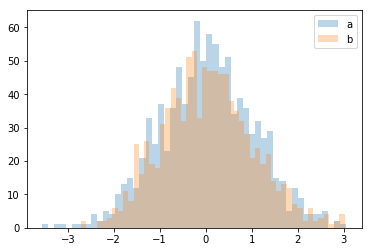

In [3]:
plt.hist(a, bins=50, label='a', alpha=0.3)   # plot a & b into a histogram
plt.hist(b, bins=50, label='b', alpha=0.3)
plt.legend();

# as seen in the histogram below, a & b overlaps closely, as expected

### 3.2) Introducing the t-test!

If you are already familiar with the t-test, and the concept of p-values, feel free to skip ahead. But if you want some refresher, here you go.

According to [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test), this is what a t-test is:

>The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

>A t-test is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known. When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution. The t-test can be used, for example, to determine if two sets of data are significantly different from each other.

**If you did not read that, it's alright. That was obviously not written for human's consumption.**

But the good folks at Minitab explained it nicely in [this blog post](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics):

> ## When you perform a t-test, you're usually trying to find evidence of a significant difference between population means (2-sample t)

That is better, isn't it? In section 1.1, we created 2 arrays: a and b. They are random, normally distributed numbers with mean values of 0.0.

So, if we perform a t-test by comparing a and b, we should expect the t-test to say that they are **not significantly different**.

**BUT...**

In every statistical test, there will be **uncertainties** in the test results, and the test results are communicated to us via the a probability known as the **p-value**.

What does the p-value mean, then?

Usually the p-value is taught (badly) in a Statistics 101 class, like this:

>*If the p-value is lesser than 0.05 (alpha), then the means between the 2 populations are statistically significant.*

>*However if the p-value is greater or equal to 0.05 (alpha), then the mean values between the 2 populations are statistically NOT significantly different.*

![zzzz](./1.0-tired-mr-monte-carlo.PNG)
**Sigh. Now we know why statistics make people doze off in class!**

Let's try again. In fact, please read the following sentence 3 more times, and let it sink.

alpha (α) is __how often you are willing to be wrong__ by having a false positive. For example, if you select an alpha value of 5%, you will be having a false positive error, 5% of the time.

**Let's remind ourselves of how arrays a & b were created, shall we?**

```python
N = 1000
a = np.random.randn(N)    # a = Normally distributed random numbers, average = 0, std = 1, size = N    
b = np.random.randn(N)    # b = Normally distributed random numbers, average = 0, std = 1, size = N 
```

Arrays a & b should have **mean values that are NOT significantly different**, therefore, we should expect the p-value should be greater than equal to our alpha value, **MOST of the time**. Yeah, most of the time, but NOT always :(

You see statistics is a confusing subject full of uncertainties. It is kind of ironic, given that statisticians tend to be precise people.

So, why **MOST of the time**, instead of **the t-test will always get it right?**

Because alpha (α).

Well, if things are starting to get muddy, blurry and confusing. No worries, let's dive into some code, and see the beauty of statistics presents itself. *OK I am a nerd and I love stats :)*

In [4]:
from statsmodels.stats.weightstats import ttest_ind   # import the t-test from statsmodels package

In [5]:
t_stat, p_val, _ = ttest_ind(a, b)     # perform the t-test on a, b. 

p_val

0.882518346463453

As shown above, p-value is 0.88, which is larger than the "usual" automaton alpha value of 0.05.

Since p-value > alpha (α), we conclude that a and b are having mean values that are statistically not significantly different. *(That is a long winded way of saying a & b are having the same average values)*

But as mentioned above in section 1.2, when running the t-test, we assume a alpha (α) value. And the alpha (α) value is **how often we are willing to be wrong**.

For example, by definition, a and b mean values are statistically NOT different. BUT if we have an alpha (α) value of 5%, it means 5% of the time, the t-test is going to tell us they have significant differences sigificantly.

In section 3.3, we will run the t-test many, many times, to see whether we are really wrong 5% of the time.

### 3.3) Monte Carlo simulation of the t-test

The word 'Monte Carlo' is a sexy-licious word, especially if you are new to statistics.

Fear not, it is just a fancy way of saying we are going to repeat doing the same thing many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many, many... times.

You see, I just did a Monte Carlo process of the word 'many' many many many many many many many many many many... times. 😅😅

Back to our discussion of alpha (α) and p-values: We will be performing a Monte Carlo process on the following:

1. Assign random, normal values to arrays a & b
2. Perform a t-test on arrays a & b.
3. Store the p-value
4. Repeat steps 1-3, 10,000 times and beat the hell out of your computer.

*(Don't worry, your computer can do this easily. It's like a Wooly Mammoth squashing ants into ant juice with it's feet)*

5. Assuming our alpha value is 5%, calculate how often the t-test in steps 1-3 got it wrong.

Simple? Let's go ahead to the code:

In [6]:
def monte_carlo_t_test(repeats=1000):
    '''
    Function to perform a Monte Carlo simulation for t-tests between to arrays of random numbers, a & b.
    a & b arrays are normally distributed random numbers with mean and standard deviation values of 0.0 and 1.0
    
    Input:
        repeats <int>: number of repeats the Monte Carlo simulation should do. Default 1000
    Return:
        np.array of p-values from the t-tests
    '''
    N = 1000                        # N is the size of the arrays a & b
    p_values = []                   # list to store the p-values
    for _ in range(repeats):        
        a = np.random.randn(N)
        b = np.random.randn(N)

        t_stat, p_val, _ = ttest_ind(a, b)    # perform t-test
        p_values.append(p_val)                # store the p-value
    
    return np.array(p_values)                 # return the list of p-values, as a Numpy array

In [7]:
alpha = 0.05   # experiment with the value of alpha, e.g. 0.01, 0.001, 0.1 etc, and see what happens

p_values = monte_carlo_t_test(repeats=10000)   # perform the Monte Carlo t-test, 10,000 times
wrong_rate = np.mean(p_values < alpha)         # how often is the t-test wrong? (every time p-value is less than alpha,
                                               # it is considered as 'wrong'. np.mean() calculates how often it is wrong.

print('t-test result is wrong {:.1%} of the time, for the alpha value of {:.1%}'.format(wrong_rate, alpha))

t-test result is wrong 5.1% of the time, for the alpha value of 5.0%


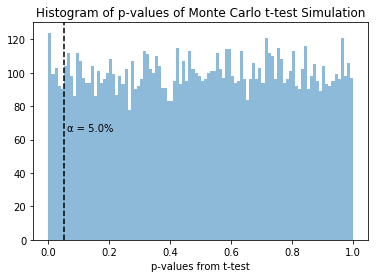

In [8]:
# visualize the distribution of p-values returned from the Monte Carlo t-test
plt.hist(p_values, bins=100, alpha=0.5)
plt.axvline(alpha, color='black', linestyle='--')
plt.title('Histogram of p-values of Monte Carlo t-test Simulation')
plt.xlabel('p-values from t-test')
plt.text(alpha + 0.01, plt.ylim()[1]/2, 'α = {:.1%}'.format(alpha));

As you can see, the t-test result is wrong at a rate that is very close to the alpha value.

And from the histogram, p-values are (roughly) evenly distributed between 0.0 and 1.0.

To get an intuition of how the alpha & p-values work, change the alpha value in the code above to other values. Run them and see what happens to the 'wrong rate' number and the histogram.

Have fun! :)